In [1]:
import pandas as pd
# sys.path.insert(0, 'D:\GitHub Repos\MLib in Python\MLib-in-python')
# import MLib
import warnings
warnings.filterwarnings("ignore")
import sklearn

# start

In [2]:
DFOriginal = pd.read_csv('csv-wsn-ids-ds.csv')
OutPutLabel : str = 'Attack type'
InputLabels : list = DFOriginal.columns.tolist()
InputLabels.remove(OutPutLabel)
print('Input Labels Count: ', len(InputLabels))
InputLabels

Input Labels Count:  18


[' id',
 ' Time',
 ' Is_CH',
 ' who CH',
 ' Dist_To_CH',
 ' ADV_S',
 ' ADV_R',
 ' JOIN_S',
 ' JOIN_R',
 ' SCH_S',
 ' SCH_R',
 'Rank',
 ' DATA_S',
 ' DATA_R',
 ' Data_Sent_To_BS',
 ' dist_CH_To_BS',
 ' send_code ',
 'Expaned Energy']

In [3]:
DFOriginal[OutPutLabel].value_counts().index.tolist()

['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

In [4]:
DFOriginal.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [5]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [6]:
# Display the number of missing values in each column
DFOriginal.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [7]:
DFOriginal.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [8]:
# Display the number of unique values in each column
DFOriginal.nunique()

 id                 11120
 Time                 196
 Is_CH                  2
 who CH              7088
 Dist_To_CH         13956
 ADV_S                 85
 ADV_R                 31
 JOIN_S                 2
 JOIN_R               101
 SCH_S                 95
 SCH_R                  2
Rank                  100
 DATA_S               192
 DATA_R              1345
 Data_Sent_To_BS      237
 dist_CH_To_BS        305
 send_code             16
Expaned Energy      69352
Attack type             5
dtype: int64

In [9]:
print(DFOriginal.duplicated().sum())

8873


In [10]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

array([[<Axes: title={'center': ' id'}>,
        <Axes: title={'center': ' Time'}>,
        <Axes: title={'center': ' Is_CH'}>,
        <Axes: title={'center': ' who CH'}>],
       [<Axes: title={'center': ' Dist_To_CH'}>,
        <Axes: title={'center': ' ADV_S'}>,
        <Axes: title={'center': ' ADV_R'}>,
        <Axes: title={'center': ' JOIN_S'}>],
       [<Axes: title={'center': ' JOIN_R'}>,
        <Axes: title={'center': ' SCH_S'}>,
        <Axes: title={'center': ' SCH_R'}>,
        <Axes: title={'center': 'Rank'}>],
       [<Axes: title={'center': ' DATA_S'}>,
        <Axes: title={'center': ' DATA_R'}>,
        <Axes: title={'center': ' Data_Sent_To_BS'}>,
        <Axes: title={'center': ' dist_CH_To_BS'}>],
       [<Axes: title={'center': ' send_code '}>,
        <Axes: title={'center': 'Expaned Energy'}>, <Axes: >, <Axes: >]],
      dtype=object)

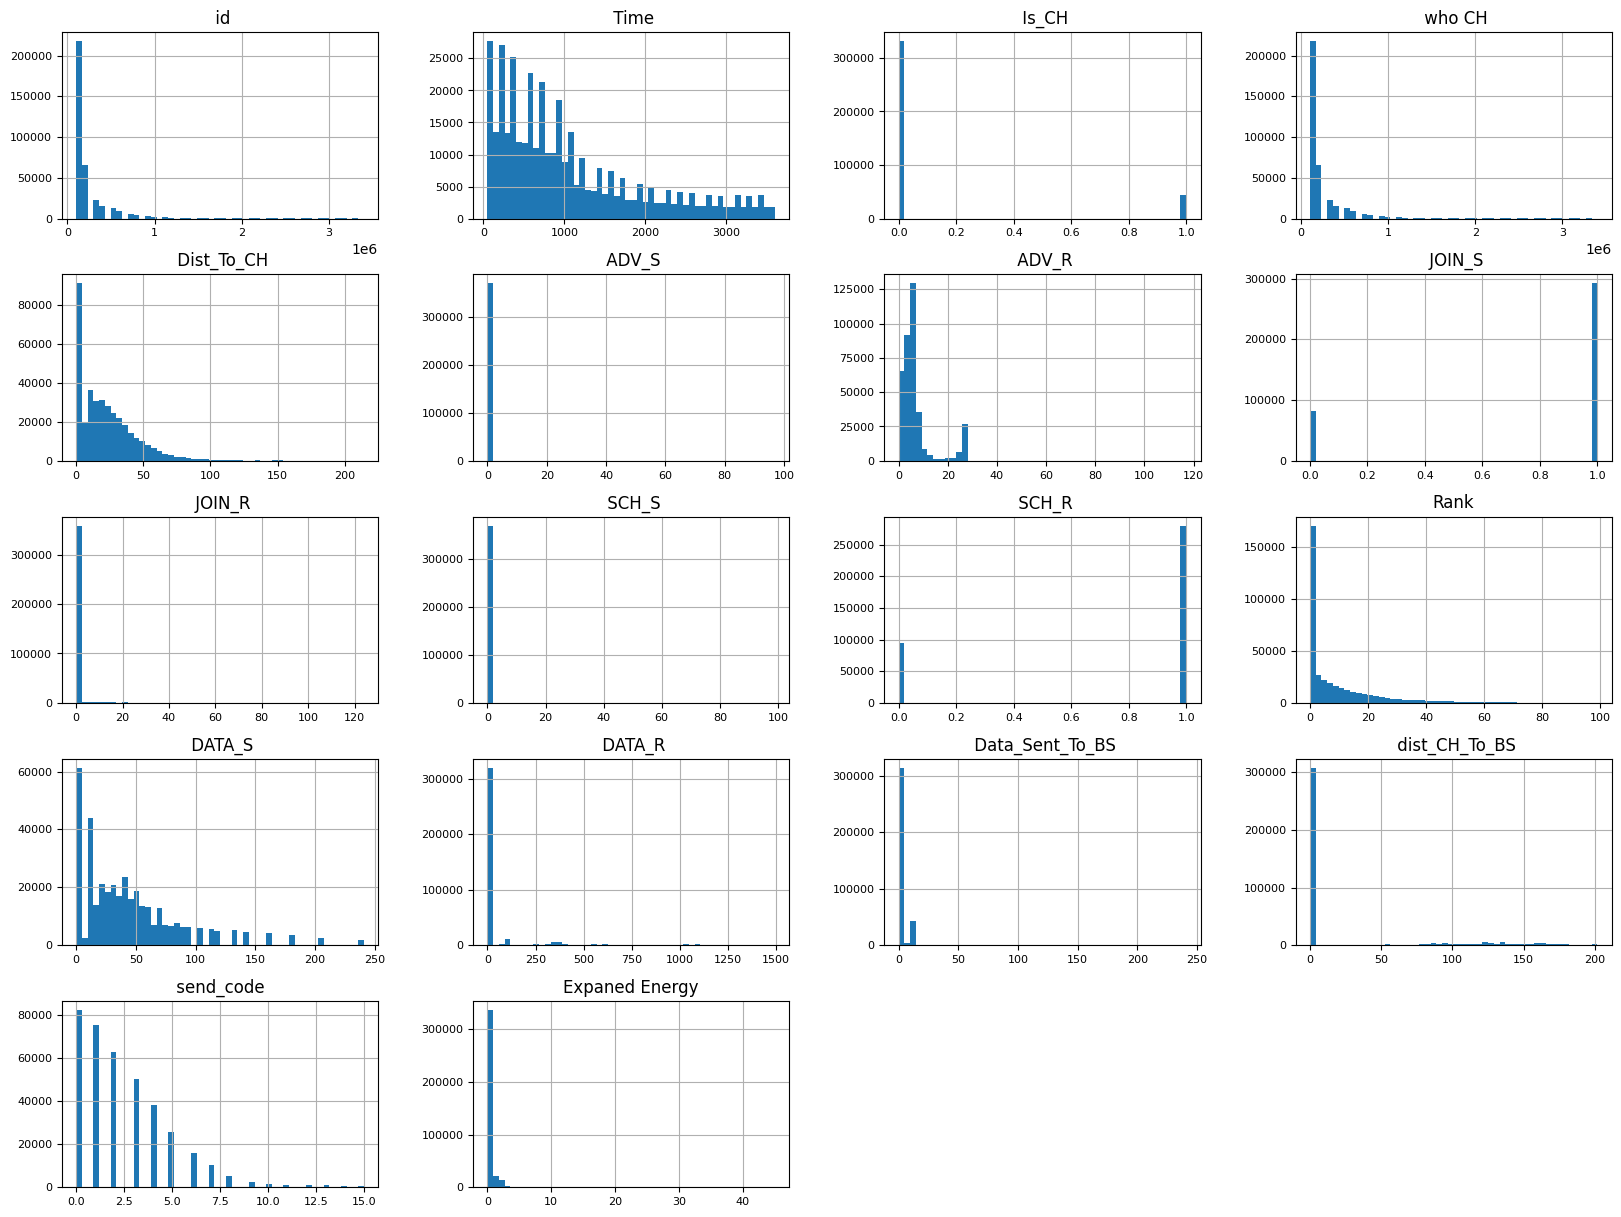

In [11]:
DFOriginal.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [12]:
# Display the first few rows of the dataset
DFOriginal.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [13]:
DFOriginalInputs = DFOriginal[InputLabels]
DFOriginalOutput = DFOriginal[OutPutLabel]

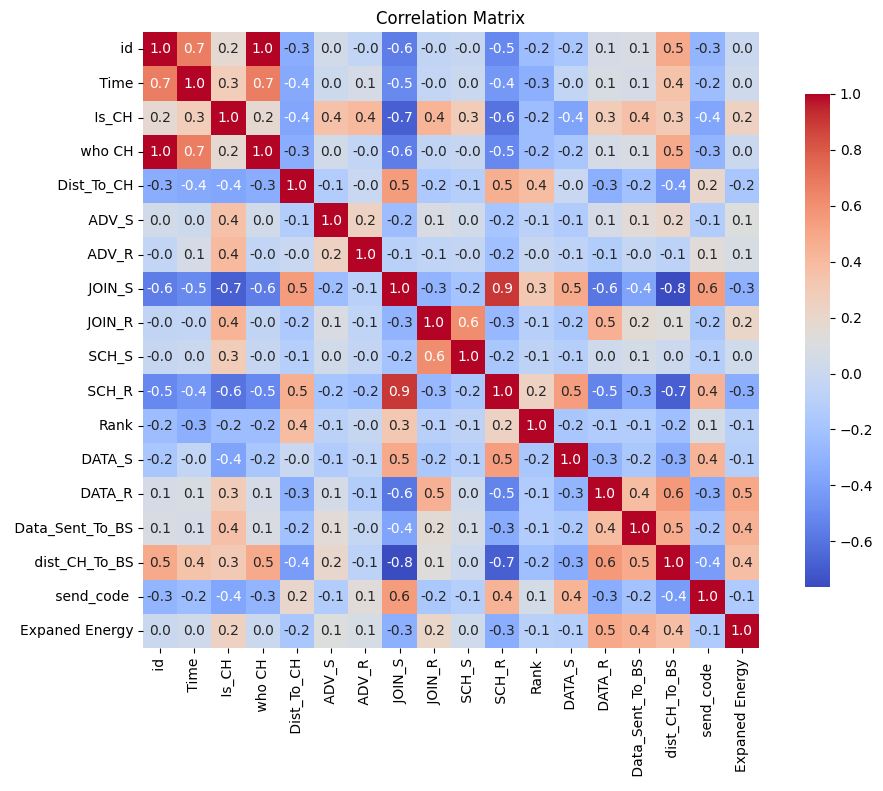

In [14]:
# print th correlation matrix with colored cells
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(DFOriginalInputs.corr(), annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


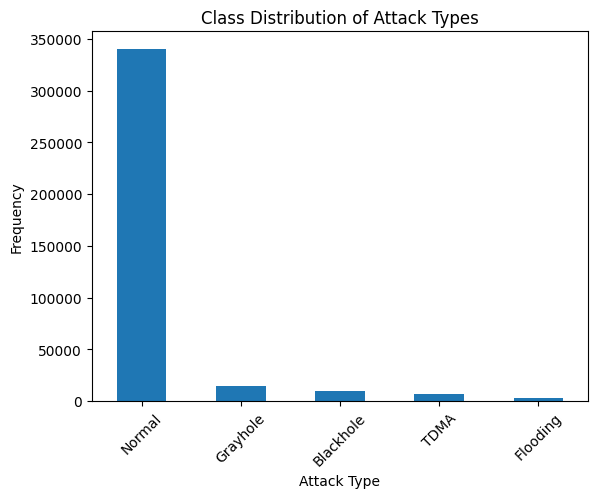

In [15]:
DFOriginalOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [16]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

normal_df = DFOriginal[DFOriginal[OutPutLabel] == 'Normal']
normal_downsampled = resample(normal_df,
                              replace=False,
                              n_samples=100000,
                              random_state=42)

minority_df = DFOriginal[DFOriginal[OutPutLabel] != 'Normal']

combined_df = pd.concat([normal_downsampled, minority_df])
X = combined_df.drop(columns=[OutPutLabel]) 
y = combined_df[OutPutLabel]               

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

DFBalanced = pd.DataFrame(X_resampled, columns=X.columns)
DFBalanced[OutPutLabel] = y_resampled


In [17]:
DFInputs = DFBalanced[InputLabels]
DFOutput = DFBalanced[OutPutLabel]

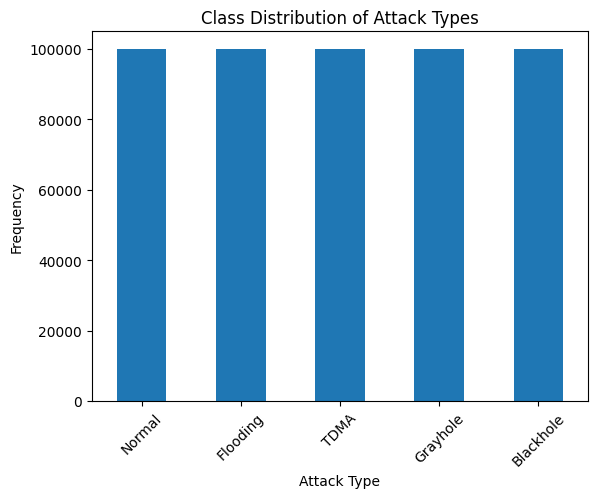

In [18]:
DFOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
def LabelEncoding(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    encoded = le.fit_transform(DF)
    return pd.DataFrame(encoded, columns=DF.columns)

In [20]:
DFInputs.shape, DFOutput.shape

((500000, 18), (500000,))

In [21]:
DFOutput = pd.DataFrame(DFOutput)

DFLEOutput = LabelEncoding(DFOutput)
DFLEOutput.head()
DFOutput = DFLEOutput

In [22]:
DFOutput.head()

,Attack type
0,3
1,3
2,3
3,3
4,3


In [ ]:
import sklearn.preprocessing

Scaler = sklearn.preprocessing.MinMaxScaler()
DFInputsScaled = pd.DataFrame(Scaler.fit_transform(DFInputs), columns=DFInputs.columns)

In [24]:
DFInputs = DFInputsScaled
DFInputs

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,0.000912,0.043099,0.0,0.000922,0.100166,0.000000,0.059829,1.0,0.000000,0.000000,1.0,0.252525,0.190871,0.000000,0.000000,0.000000,0.400000,0.001766
1,0.032115,0.367042,0.0,0.032112,0.247481,0.000000,0.008547,1.0,0.000000,0.000000,1.0,0.141414,0.058091,0.000000,0.000000,0.000000,0.066667,0.000668
2,0.061211,0.550141,0.0,0.061214,0.114291,0.000000,0.017094,1.0,0.000000,0.000000,1.0,0.070707,0.099585,0.000000,0.000000,0.000000,0.066667,0.000996
3,0.122711,0.634648,0.0,0.122717,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.053942,0.330877,0.053942,0.788106,0.000000,0.021115
4,0.002127,0.099437,0.0,0.002143,0.137286,0.000000,0.051282,1.0,0.000000,0.000000,1.0,0.070707,0.236515,0.000000,0.000000,0.000000,0.066667,0.002200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.061197,0.409296,1.0,0.061214,0.000000,0.010309,0.076923,0.0,0.016129,0.020202,0.0,0.000000,0.000000,0.010047,0.000000,0.000000,0.000000,0.019015
499996,0.092719,0.747324,1.0,0.092727,0.000000,0.010309,0.051282,0.0,0.072581,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000145
499997,0.004241,0.198028,1.0,0.004241,0.000000,0.010309,0.042735,0.0,0.032258,0.040404,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004860
499998,0.060590,0.518310,1.0,0.060590,0.000000,0.010309,0.034188,0.0,0.161290,0.202020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000157


Top 12 Features: [' ADV_S', ' SCH_S', 'Expaned Energy', ' Is_CH', ' dist_CH_To_BS', ' Data_Sent_To_BS', ' DATA_R', ' JOIN_R', ' ADV_R', ' DATA_S', 'Rank', ' Time']


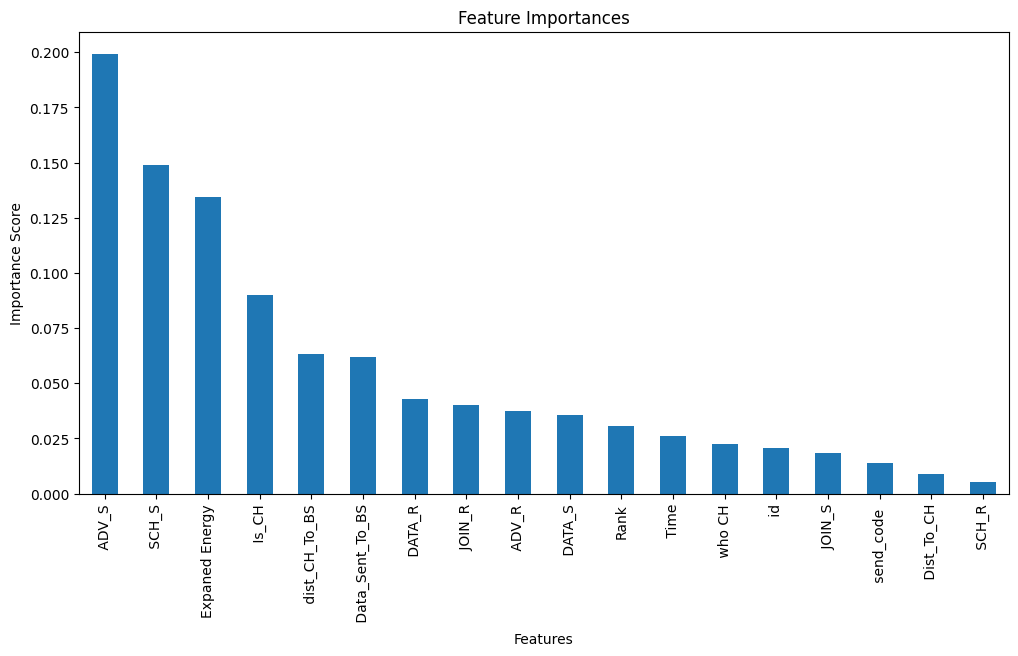

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# import matplotlib.pyplot as plt

# RF = RandomForestClassifier(n_estimators=100, random_state=42)
# RF.fit(DFInputs, DFOutput)

# feature_importances = pd.Series(RF.feature_importances_, index=DFInputs.columns)

# sorted_features = feature_importances.sort_values(ascending=False)

# top_features = sorted_features.head(12).index.tolist()
# print("Top 12 Features:", top_features)

# plt.figure(figsize=(12, 6))
# sorted_features.plot(kind='bar')
# plt.title('Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance Score')
# plt.show()
top_features = [' ADV_S', ' SCH_S', 'Expaned Energy', ' Is_CH', ' dist_CH_To_BS', ' Data_Sent_To_BS', ' DATA_R', ' JOIN_R', ' ADV_R', ' DATA_S', 'Rank', ' Time']

In [ ]:
top_features


[' ADV_S',
 ' SCH_S',
 'Expaned Energy',
 ' Is_CH',
 ' dist_CH_To_BS',
 ' Data_Sent_To_BS',
 ' DATA_R',
 ' JOIN_R',
 ' ADV_R',
 ' DATA_S',
 'Rank',
 ' Time']

In [27]:
print('Inputs Features before:', DFInputs.shape)
DFInputs = DFInputs[top_features]
print('Inputs Features after:', DFInputs.shape)

Inputs Features before: (500000, 18)
Inputs Features after: (500000, 12)


In [28]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
TrainInput, TestInput, TrainOutput, TestOutput = train_test_split(DFInputs, DFOutput, train_size=0.8, random_state=42, stratify=DFOutput)

In [29]:
import sklearn.metrics
def ComputeMetrics(ytrue, ypredicted, ypredictedProba):
    accuracy = sklearn.metrics.accuracy_score(TestOutput,ypredicted)
    balanced_accuracy = sklearn.metrics.balanced_accuracy_score(TestOutput,ypredicted)
    precision = sklearn.metrics.precision_score(TestOutput,ypredicted,average='weighted')
    recall = sklearn.metrics.recall_score(TestOutput,ypredicted,average='weighted')
    f1 = sklearn.metrics.f1_score(TestOutput,ypredicted,average='weighted')
    roc_auc = sklearn.metrics.roc_auc_score(TestOutput,ypredictedProba, average='weighted', multi_class='ovr')
    matthews_corrcoef = sklearn.metrics.matthews_corrcoef(TestOutput,ypredicted)
    return accuracy, balanced_accuracy, precision, recall, f1, roc_auc, matthews_corrcoef


In [30]:
class_names = DFOriginal[OutPutLabel].unique()
def VisualizeConfusionMatrix(ConfusionMatrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.show()

# 1- Logistic Regression

In [31]:
import sklearn.linear_model
# make a random search for the best hyperparameters of the logistic regression model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': randint(100, 1000)
}

ModelLR = sklearn.linear_model.LogisticRegression(class_weight='balanced')
random_search = RandomizedSearchCV(ModelLR, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())

best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

ModelLR = sklearn.linear_model.LogisticRegression(**best_params, class_weight='balanced')
ModelLR.fit(TrainInput, TrainOutput.values.ravel())

# ModelLR = sklearn.linear_model.LogisticRegression(max_iter=1000,solver='newton-cg',class_weight='balanced')
# ModelLR.fit(TrainInput, TrainOutput)

Best Hyperparameters:  {'C': np.float64(7.896910002727692), 'max_iter': 120, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=np.float64(7.896910002727692), class_weight='balanced',
                   max_iter=120, penalty='l1', solver='liblinear')

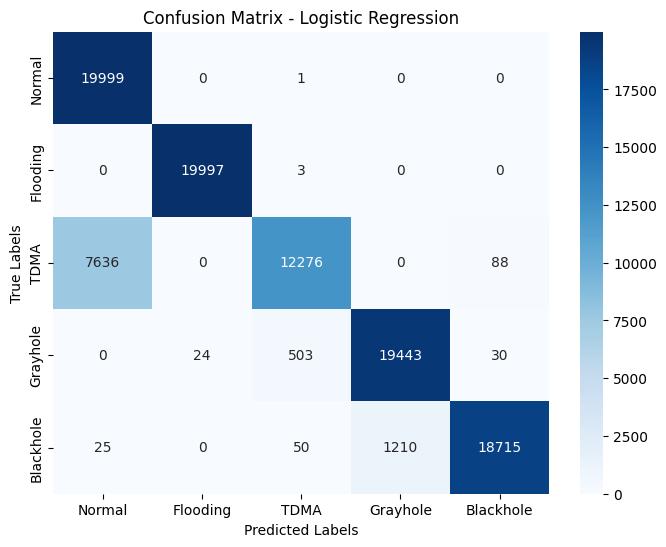

In [32]:
ypred = ModelLR.predict(TestInput)
ypredProba = ModelLR.predict_proba(TestInput)
ConfusionMatrixLR = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixLR)

In [33]:
LogLossLR = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossLR)

Log Loss:  0.20811777246884186


In [34]:
accuracyLR, balanced_accuracyLR, precisionLR, recallLR, f1LR, roc_aucLR, matthews_corrcoefLR = ComputeMetrics(TestOutput, ypred, ypredProba)

In [35]:
print(f'{'accuracy': <30}', accuracyLR)
print(f'{'balanced_accuracy': <30}', balanced_accuracyLR)
print(f'{'precision': <30}', precisionLR)
print(f'{'recall': <30}', recallLR)
print(f'{'f1': <30}', f1LR)
print(f'{'roc_auc': <30}', roc_aucLR)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLR)

accuracy                       0.9043
balanced_accuracy              0.9042999999999999
precision                      0.9227148903567749
recall                         0.9043
f1                             0.9013502720162526
roc_auc                        0.9863018286249999
matthews_corrcoef              0.886593555904701


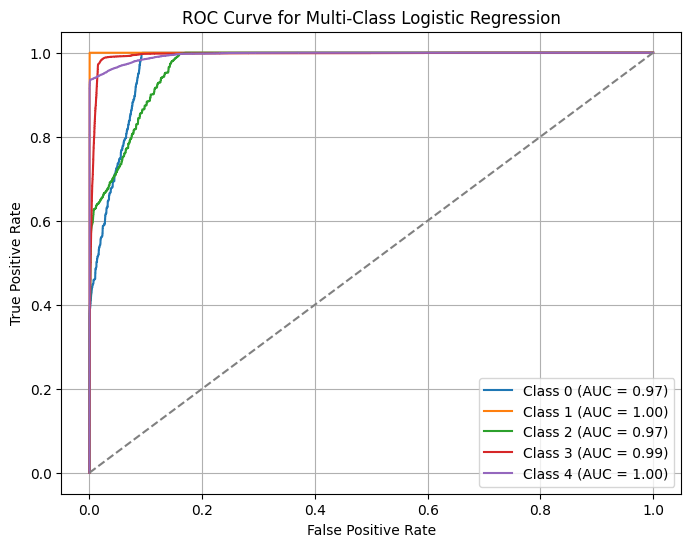

In [36]:
import sklearn.metrics


plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixLR.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 2- Decision Tree

In [37]:
import sklearn.tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
ModelDT = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelDT, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelDT = sklearn.tree.DecisionTreeClassifier(**best_params, class_weight='balanced')
ModelDT.fit(TrainInput, TrainOutput.values.ravel())

# ModelDT = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')
# ModelDT.fit(TrainInput, TrainOutput.values.ravel())

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3}


DecisionTreeClassifier(class_weight='balanced', max_depth=14,
                       max_features='sqrt', min_samples_leaf=9,
                       min_samples_split=3)

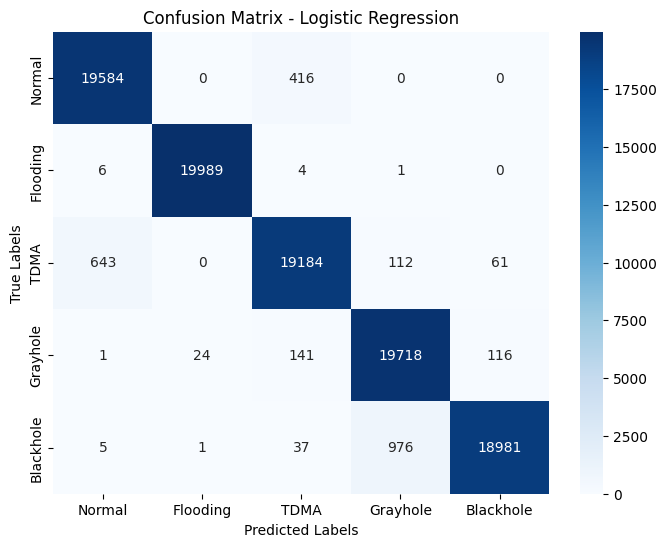

In [38]:
ypred = ModelDT.predict(TestInput)
ypredProba = ModelDT.predict_proba(TestInput)
ConfusionMatrixDT = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixDT)

In [39]:
accuracyDT, balanced_accuracyDT, precisionDT, recallDT, f1DT, roc_aucDT, matthews_corrcoefDT = ComputeMetrics(TestOutput, ypred, ypredProba)

In [40]:
print(f'{'accuracy': <30}', accuracyDT)
print(f'{'balanced_accuracy': <30}', balanced_accuracyDT)
print(f'{'precision': <30}', precisionDT)
print(f'{'recall': <30}', recallDT)
print(f'{'f1': <30}', f1DT)
print(f'{'roc_auc': <30}', roc_aucDT)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefDT)

accuracy                       0.97456
balanced_accuracy              0.97456
precision                      0.9749161996225183
recall                         0.97456
f1                             0.9745601052935844
roc_auc                        0.9983048215625
matthews_corrcoef              0.9682886662585661


In [41]:
LogLossDT = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossDT)

Log Loss:  0.09152564536898285


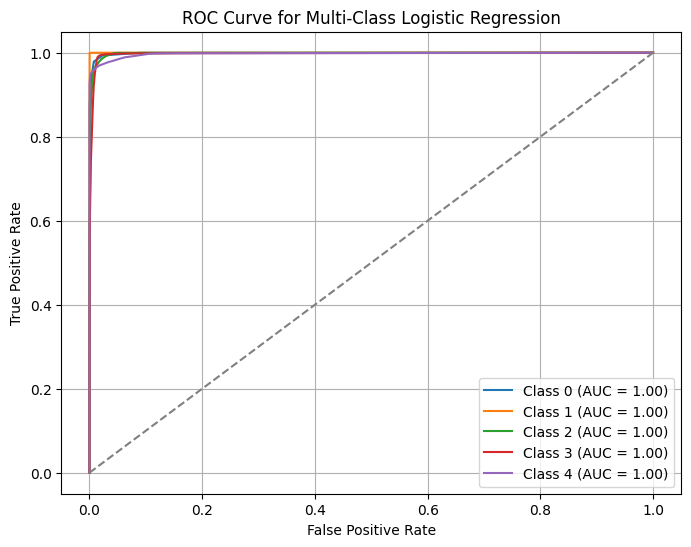

In [42]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixDT.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 3- Random Forest

In [43]:
# make a random search for the best hyperparameters of the random forest model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
ModelRF = sklearn.ensemble.RandomForestClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelRF, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelRF = sklearn.ensemble.RandomForestClassifier(**best_params, class_weight='balanced')
ModelRF.fit(TrainInput, TrainOutput.values.ravel())

# ModelRF = sklearn.ensemble.RandomForestClassifier(class_weight='balanced')
# ModelRF.fit(TrainInput, TrainOutput)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131}


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_leaf=8,
                       min_samples_split=8, n_estimators=131)

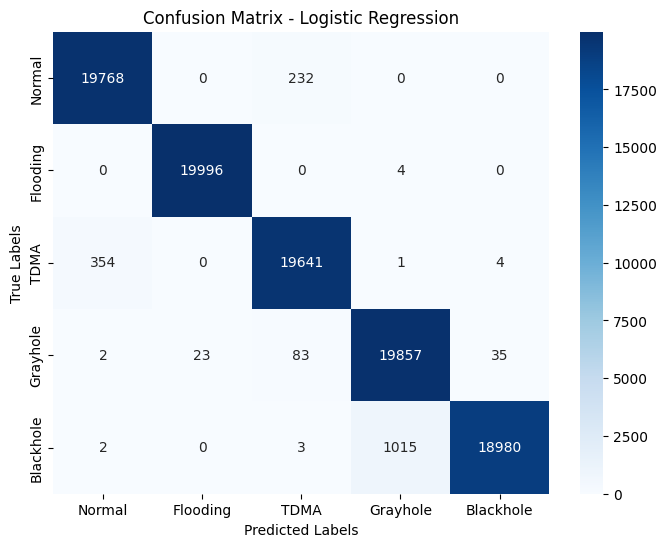

In [44]:
ypred = ModelRF.predict(TestInput)
ypredProba = ModelRF.predict_proba(TestInput)
ConfusionMatrixRF = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixRF)

In [45]:
accuracyRF, balanced_accuracyRF, precisionRF, recallRF, f1RF, roc_aucRF, matthews_corrcoefRF = ComputeMetrics(TestOutput, ypred, ypredProba)

In [46]:
print(f'{'accuracy': <30}', accuracyRF)
print(f'{'balanced_accuracy': <30}', balanced_accuracyRF)
print(f'{'precision': <30}', precisionRF)
print(f'{'recall': <30}', recallRF)
print(f'{'f1': <30}', f1RF)
print(f'{'roc_auc': <30}', roc_aucRF)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefRF)

accuracy                       0.98242
balanced_accuracy              0.98242
precision                      0.9828444636046006
recall                         0.98242
f1                             0.9824174880142726
roc_auc                        0.9994603251874999
matthews_corrcoef              0.9781319528387838


In [47]:
LogLossRF = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossRF)

Log Loss:  0.0561734312913133


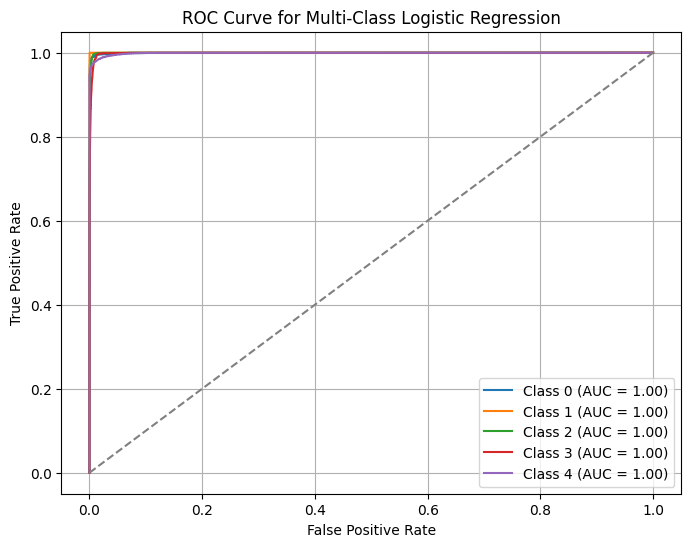

In [48]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixRF.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 4- SVM

In [49]:
import sklearn.svm
# make a random search for the best hyperparameters of the SVM model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),
    'gamma': ['scale', 'auto'],
    'coef0': uniform(0, 1),
    'shrinking': [True, False],
}
ModelSVM = sklearn.svm.SVC()
random_search = RandomizedSearchCV(ModelSVM, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelSVM = sklearn.svm.SVC(**best_params)
ModelSVM.fit(TrainInput, TrainOutput.values.ravel())

# ModelSVM = sklearn.svm.LinearSVC()
# ModelSVM.fit(TrainInput, TrainOutput.values.ravel())


Best Hyperparameters:  {'C': np.float64(6.1111501174320875), 'coef0': np.float64(0.7080725777960455), 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}


SVC(C=np.float64(6.1111501174320875), coef0=np.float64(0.7080725777960455),
    degree=2, kernel='poly', shrinking=False)

In [ ]:
ypred = ModelSVM.predict(TestInput)
ypredProba = ModelSVM.predict_proba(TestInput)
ConfusionMatrixSVM = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixSVM)

In [ ]:
accuracySVM, balanced_accuracySVM, precisionSVM, recallSVM, f1SVM, roc_aucSVM, matthews_corrcoefSVM = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracySVM)
print(f'{'balanced_accuracy': <30}', balanced_accuracySVM)
print(f'{'precision': <30}', precisionSVM)
print(f'{'recall': <30}', recallSVM)
print(f'{'f1': <30}', f1SVM)
print(f'{'roc_auc': <30}', roc_aucSVM)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefSVM)

accuracy                       0.90388
balanced_accuracy              0.90388
precision                      0.9225702614002191
recall                         0.90388
f1                             0.9009135444799478
roc_auc                        0.98373033975
matthews_corrcoef              0.8861216063256315


In [ ]:
LogLossSVM = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossSVM)

Log Loss:  0.5534922016967077


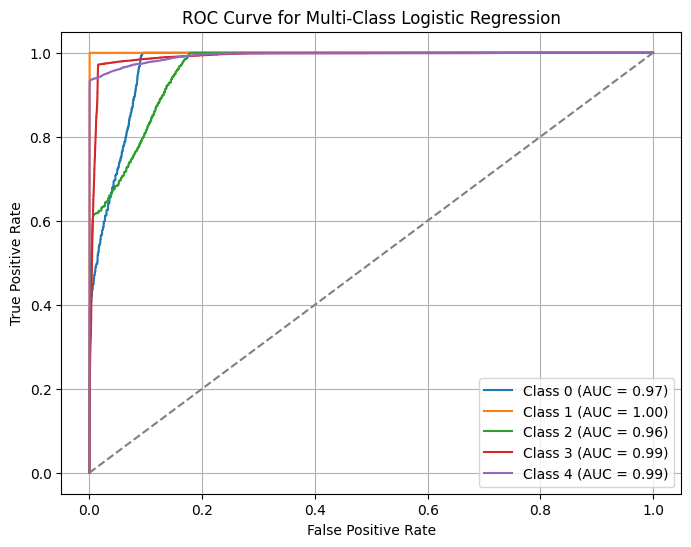

In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixSVM.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 5- KNN

In [ ]:
# knn
import sklearn.neighbors
# make a random search for the best hyperparameters of the knn model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(1, 50),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
ModelKNN = sklearn.neighbors.KNeighborsClassifier()
random_search = RandomizedSearchCV(ModelKNN, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelKNN = sklearn.neighbors.KNeighborsClassifier(**best_params)
ModelKNN.fit(TrainInput, TrainOutput.values.ravel())


# ModelKNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7)
# ModelKNN.fit(TrainInput, TrainOutput.values.ravel())

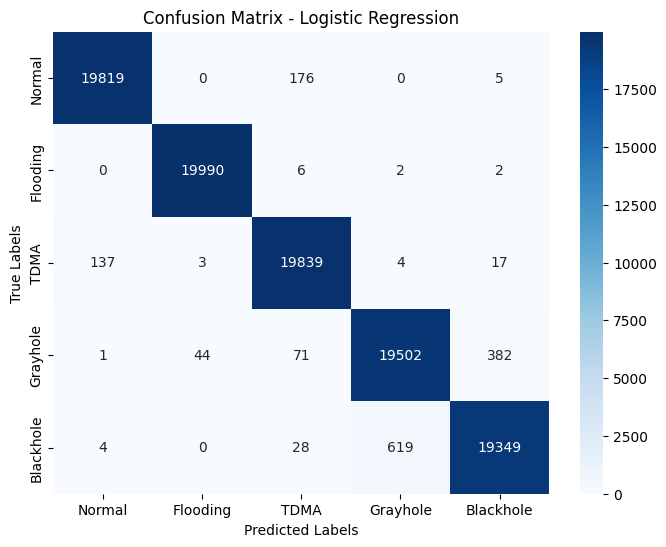

In [ ]:
ypred = ModelKNN.predict(TestInput)
ypredProba = ModelKNN.predict_proba(TestInput)
ConfusionMatrixKNN = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixKNN)


In [ ]:
accuracyKNN, balanced_accuracyKNN, precisionKNN, recallKNN, f1KNN, roc_aucKNN, matthews_corrcoefKNN = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracyKNN)
print(f'{'balanced_accuracy': <30}', balanced_accuracyKNN)
print(f'{'precision': <30}', precisionKNN)
print(f'{'recall': <30}', recallKNN)
print(f'{'f1': <30}', f1KNN)
print(f'{'roc_auc': <30}', roc_aucKNN)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefKNN)

accuracy                       0.98499
balanced_accuracy              0.98499
precision                      0.9849939381925435
recall                         0.98499
f1                             0.9849804984735752
roc_auc                        0.9979384252499999
matthews_corrcoef              0.9812432307225126


In [ ]:
LogLossKNN = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossKNN)

Log Loss:  0.13090197763850353


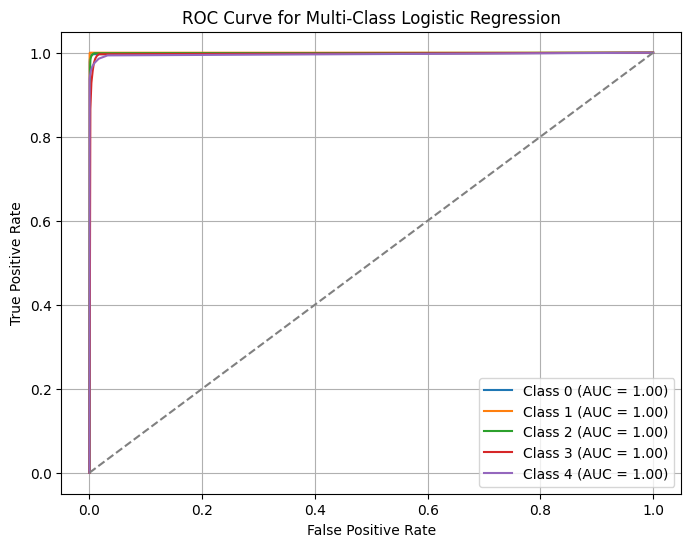

In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixKNN.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 6- XGBClassifier

In [ ]:
# XGBClassifier

import xgboost as xgb
# make a random search for the best hyperparameters of the xgboost model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
}
ModelXGB = xgb.XGBClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelXGB, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelXGB = xgb.XGBClassifier(**best_params, class_weight='balanced')
ModelXGB.fit(TrainInput, TrainOutput.values.ravel())

# ModelXGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', class_weight='balanced')
# ModelXGB.fit(TrainInput, TrainOutput.values.ravel())

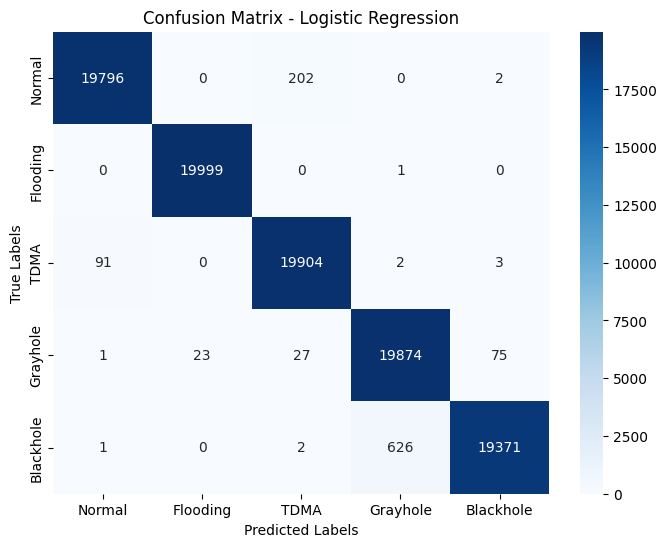

In [ ]:
ypred = ModelXGB.predict(TestInput)
ypredProba = ModelXGB.predict_proba(TestInput)
ConfusionMatrixXGB = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixXGB)


In [ ]:
accuracyXGB, balanced_accuracyXGB, precisionXGB, recallXGB, f1XGB, roc_aucXGB, matthews_corrcoefXGB = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracyXGB)
print(f'{'balanced_accuracy': <30}', balanced_accuracyXGB)
print(f'{'precision': <30}', precisionXGB)
print(f'{'recall': <30}', recallXGB)
print(f'{'f1': <30}', f1XGB)
print(f'{'roc_auc': <30}', roc_aucXGB)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefXGB)

accuracy                       0.98944
balanced_accuracy              0.9894400000000001
precision                      0.9895822830957819
recall                         0.98944
f1                             0.9894389820710929
roc_auc                        0.9997346128125
matthews_corrcoef              0.9868361089938543


In [ ]:
LogLossXGB = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossXGB)

Log Loss:  0.03224364293984063


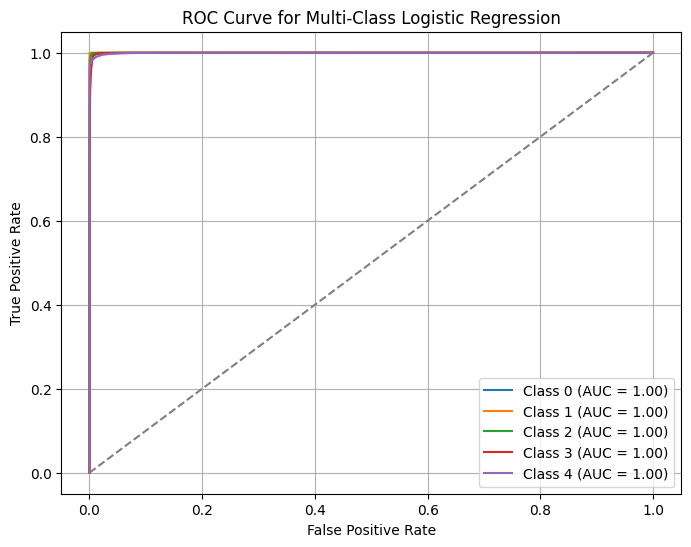

In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixXGB.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 7- LGBMClassifier

In [ ]:
# LGBMClassifier
import lightgbm as lgb
# make a random search for the best hyperparameters of the lightgbm model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}
ModelLGBM = lgb.LGBMClassifier()
random_search = RandomizedSearchCV(ModelLGBM, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelLGBM = lgb.LGBMClassifier(**best_params)
ModelLGBM.fit(TrainInput, TrainOutput.values.ravel())

# ModelLGBM = lgb.LGBMClassifier()
# ModelLGBM.fit(TrainInput, TrainOutput.values.ravel())


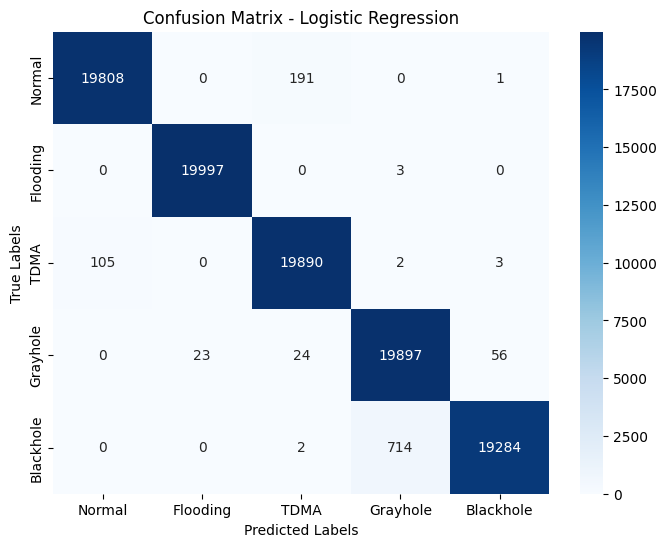

In [ ]:
ypred = ModelLGBM.predict(TestInput)
ypredProba = ModelLGBM.predict_proba(TestInput)
ConfusionMatrixLGBM = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixLGBM)

In [ ]:
accuracyLGBM, balanced_accuracyLGBM, precisionLGBM, recallLGBM, f1LGBM, roc_aucLGBM, matthews_corrcoefLGBM = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracyLGBM)
print(f'{'balanced_accuracy': <30}', balanced_accuracyLGBM)
print(f'{'precision': <30}', precisionLGBM)
print(f'{'recall': <30}', recallLGBM)
print(f'{'f1': <30}', f1LGBM)
print(f'{'roc_auc': <30}', roc_aucLGBM)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLGBM)


accuracy                       0.98876
balanced_accuracy              0.9887599999999999
precision                      0.9889616777195072
recall                         0.98876
f1                             0.988758831099916
roc_auc                        0.9997072333750001
matthews_corrcoef              0.9860011014475498


In [ ]:
LogLossLGBM = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossLGBM)

Log Loss:  0.033958158072374844


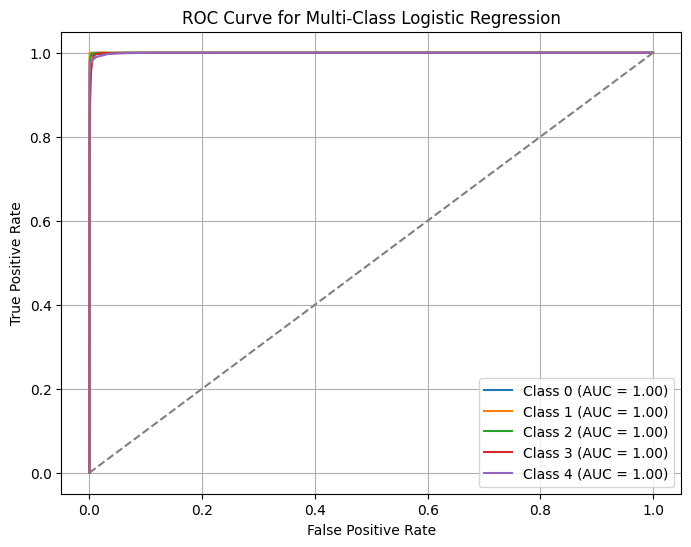

In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixLGBM.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 8- ExtraTreesClassifier

In [ ]:
# ExtraTreesClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the ExtraTreesClassifier model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
ModelETC = sklearn.ensemble.ExtraTreesClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelETC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelETC = sklearn.ensemble.ExtraTreesClassifier(**best_params, class_weight='balanced')
ModelETC.fit(TrainInput, TrainOutput.values.ravel())
# ModelETC = sklearn.ensemble.ExtraTreesClassifier(class_weight='balanced')
# ModelETC.fit(TrainInput, TrainOutput.values.ravel())


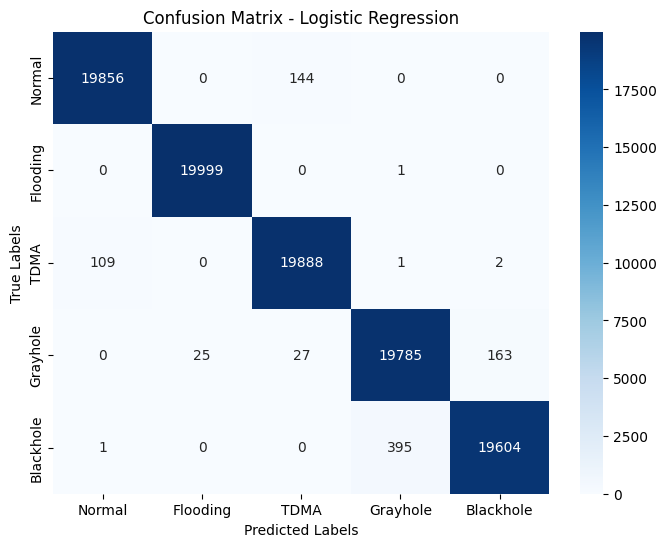

In [ ]:
ypred = ModelETC.predict(TestInput)
ypredProba = ModelETC.predict_proba(TestInput)
ConfusionMatrixETC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixETC)


In [ ]:
accuracyETC, balanced_accuracyETC, precisionETC, recallETC, f1ETC, roc_aucETC, matthews_corrcoefETC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracyETC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyETC)
print(f'{'precision': <30}', precisionETC)
print(f'{'recall': <30}', recallETC)
print(f'{'f1': <30}', f1ETC)
print(f'{'roc_auc': <30}', roc_aucETC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefETC)



accuracy                       0.99132
balanced_accuracy              0.99132
precision                      0.9913399771413618
recall                         0.99132
f1                             0.9913186485562987
roc_auc                        0.9991195185
matthews_corrcoef              0.9891556689910284


In [ ]:
LogLossETC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossETC)


Log Loss:  0.06337906078910112


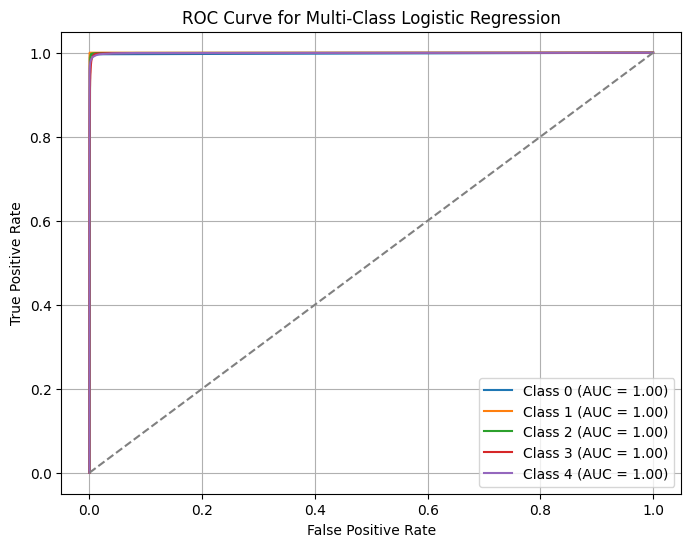

In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixETC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 9- BaggingClassifier

In [ ]:
# BaggingClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the BaggingClassifier model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_samples': uniform(0.1, 1.0),
    'max_features': uniform(0.1, 1.0),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}
ModelBC = sklearn.ensemble.BaggingClassifier()
random_search = RandomizedSearchCV(ModelBC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelBC = sklearn.ensemble.BaggingClassifier(**best_params)
ModelBC.fit(TrainInput, TrainOutput.values.ravel())
# ModelBC = sklearn.ensemble.BaggingClassifier()
# ModelBC.fit(TrainInput, TrainOutput.values.ravel())


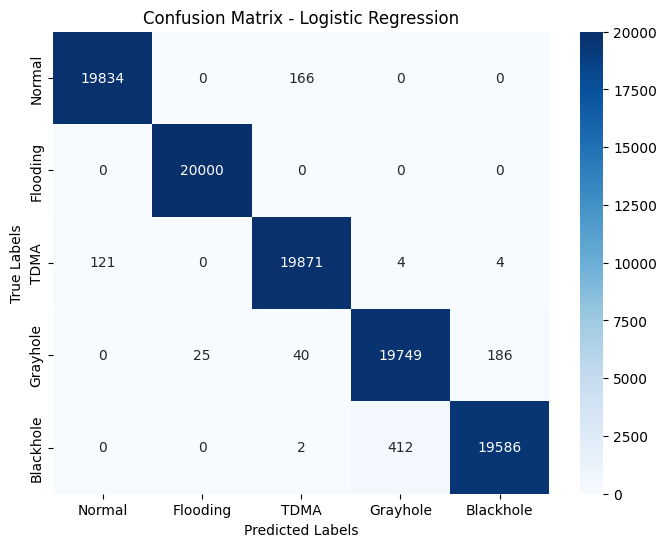

In [ ]:
ypred = ModelBC.predict(TestInput)
ypredProba = ModelBC.predict_proba(TestInput)
ConfusionMatrixBC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixBC)


In [ ]:
accuracyBC, balanced_accuracyBC, precisionBC, recallBC, f1BC, roc_aucBC, matthews_corrcoefBC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracyBC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyBC)
print(f'{'precision': <30}', precisionBC)
print(f'{'recall': <30}', recallBC)
print(f'{'f1': <30}', f1BC)
print(f'{'roc_auc': <30}', roc_aucBC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefBC)


accuracy                       0.9904
balanced_accuracy              0.9904
precision                      0.9904182852861027
recall                         0.9904
f1                             0.9903984763188507
roc_auc                        0.99832623825
matthews_corrcoef              0.9880053285741075


In [ ]:
LogLossBC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossBC)


Log Loss:  0.10780271663860266


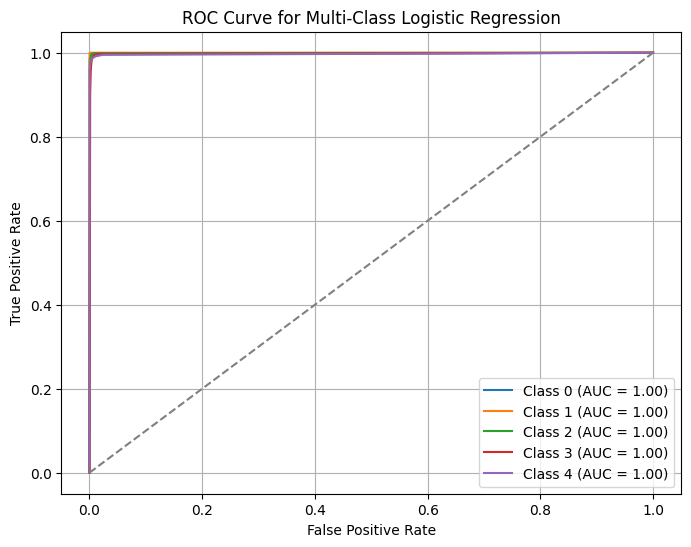

In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixBC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 10- VotingClassifier

In [ ]:
# # VotingClassifier
# import sklearn.ensemble
# import xgboost as xgb
# import lightgbm as lgb
# import sklearn.linear_model
# import sklearn.ensemble
# import sklearn.tree
# import sklearn.svm
# import sklearn.neighbors

# ModelVC = sklearn.ensemble.VotingClassifier(estimators=[('lr', sklearn.linear_model.LogisticRegression()),
#                    ('rf', sklearn.ensemble.RandomForestClassifier()),
#                    ('dt', sklearn.tree.DecisionTreeClassifier()),
#                    ('svc', sklearn.svm.SVC(probability=True)),
#                    ('knn', sklearn.neighbors.KNeighborsClassifier()),
#                    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
#                    ('lgbm', lgb.LGBMClassifier()),
#                    ('etc', sklearn.ensemble.ExtraTreesClassifier()),
#                    ('bc', sklearn.ensemble.BaggingClassifier())], voting='soft')


In [ ]:
# ModelVC.fit(TrainInput, TrainOutput.values.ravel())

In [ ]:
# ypred = ModelVC.predict(TestInput)
# ypredProba = ModelVC.predict_proba(TestInput)
# ConfusionMatrixVC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
# VisualizeConfusionMatrix(ConfusionMatrixVC)

In [ ]:
# accuracyVC, balanced_accuracyVC, precisionVC, recallVC, f1VC, roc_aucVC, matthews_corrcoefVC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
# print(f'{'accuracy': <30}', accuracyVC)
# print(f'{'balanced_accuracy': <30}', balanced_accuracyVC)
# print(f'{'precision': <30}', precisionVC)
# print(f'{'recall': <30}', recallVC)
# print(f'{'f1': <30}', f1VC)
# print(f'{'roc_auc': <30}', roc_aucVC)
# print(f'{'matthews_corrcoef': <30}', matthews_corrcoefVC)


In [ ]:
# LogLossVC = sklearn.metrics.log_loss(TestOutput, ypredProba)
# print("Log Loss: ", LogLossVC)


In [ ]:
# import sklearn.metrics

# plt.figure(figsize=(8, 6))
# for i in range(ConfusionMatrixVC.shape[0]):
#     fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
#     auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
#     plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

# plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve for Multi-Class Logistic Regression")
# plt.legend()
# plt.grid()
# plt.show()

# Visualizations and Comparisons

In [ ]:
ModelNames = [
    "Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN",
    "XGBoost", "LightGBM", "Extra Trees", "Bagging"
]
MetricNames = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss', 'Matthews Correlation Coefficient']


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from builtins import min, max

def PlotArrayVSModelNames(array, PlotName : str):
    sorted_indices = numpy.argsort(array)
    sorted_array = numpy.array(array)[sorted_indices]
    sorted_names = numpy.array(ModelNames)[sorted_indices]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sorted_array, y=sorted_names, palette="Blues_d", orient='h')

    for i, (loss, name) in enumerate(zip(sorted_array, sorted_names)):
        plt.text(loss + 0.001, i, f"{loss:.4f}", va='center', fontsize=9)

    min_loss = min(sorted_array)
    max_loss = max(sorted_array)
    plt.xlim(min_loss - 0.01, max_loss + 0.01)

    plt.xlabel(PlotName)
    plt.title(f"Model {PlotName} Comparison")
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


In [ ]:

ModelsMetrics = {
    'Logistic Regression': {
        'Accuracy': accuracyLR,
        'Balanced Accuracy': balanced_accuracyLR,
        'Precision': precisionLR,
        'Recall': recallLR,
        'F1-Score': f1LR,
        'ROC AUC': roc_aucLR,
        'Log Loss': LogLossLR,
        'Matthews Correlation Coefficient': matthews_corrcoefLR,
    },
    'Decision Tree': {
        'Accuracy': accuracyDT,
        'Balanced Accuracy': balanced_accuracyDT,
        'Precision': precisionDT,
        'Recall': recallDT,
        'F1-Score': f1DT,
        'ROC AUC': roc_aucDT,
        'Log Loss': LogLossDT,
        'Matthews Correlation Coefficient': matthews_corrcoefDT,
    },
    'Random Forest': {
        'Accuracy': accuracyRF,
        'Balanced Accuracy': balanced_accuracyRF,
        'Precision': precisionRF,
        'Recall': recallRF,
        'F1-Score': f1RF,
        'ROC AUC': roc_aucRF,
        'Log Loss': LogLossRF,
        'Matthews Correlation Coefficient': matthews_corrcoefRF,
    },
    'SVM': {
        'Accuracy': accuracySVM,
        'Balanced Accuracy': balanced_accuracySVM,
        'Precision': precisionSVM,
        'Recall': recallSVM,
        'F1-Score': f1SVM,
        'ROC AUC': roc_aucSVM,
        'Log Loss': LogLossSVM,
        'Matthews Correlation Coefficient': matthews_corrcoefSVM,
    },
    'KNN': {
        'Accuracy': accuracyKNN,
        'Balanced Accuracy': balanced_accuracyKNN,
        'Precision': precisionKNN,
        'Recall': recallKNN,
        'F1-Score': f1KNN,
        'ROC AUC': roc_aucKNN,
        'Log Loss': LogLossKNN,
        'Matthews Correlation Coefficient': matthews_corrcoefKNN,
    },
    'XGBoost': {
        'Accuracy': accuracyXGB,
        'Balanced Accuracy': balanced_accuracyXGB,
        'Precision': precisionXGB,
        'Recall': recallXGB,
        'F1-Score': f1XGB,
        'ROC AUC': roc_aucXGB,
        'Log Loss': LogLossXGB,
        'Matthews Correlation Coefficient': matthews_corrcoefXGB,
    },
    'LightGBM': {
        'Accuracy': accuracyLGBM,
        'Balanced Accuracy': balanced_accuracyLGBM,
        'Precision': precisionLGBM,
        'Recall': recallLGBM,
        'F1-Score': f1LGBM,
        'ROC AUC': roc_aucLGBM,
        'Log Loss': LogLossLGBM,
        'Matthews Correlation Coefficient': matthews_corrcoefLGBM,
    },
    'Extra Trees': {
        'Accuracy': accuracyETC,
        'Balanced Accuracy': balanced_accuracyETC,
        'Precision': precisionETC,
        'Recall': recallETC,
        'F1-Score': f1ETC,
        'ROC AUC': roc_aucETC,
        'Log Loss': LogLossETC,
        'Matthews Correlation Coefficient': matthews_corrcoefETC,
    },
    'Bagging': {
        'Accuracy': accuracyBC,
        'Balanced Accuracy': balanced_accuracyBC,
        'Precision': precisionBC,
        'Recall': recallBC,
        'F1-Score': f1BC,
        'ROC AUC': roc_aucBC,
        'Log Loss': LogLossBC,
        'Matthews Correlation Coefficient': matthews_corrcoefBC,
    },
}

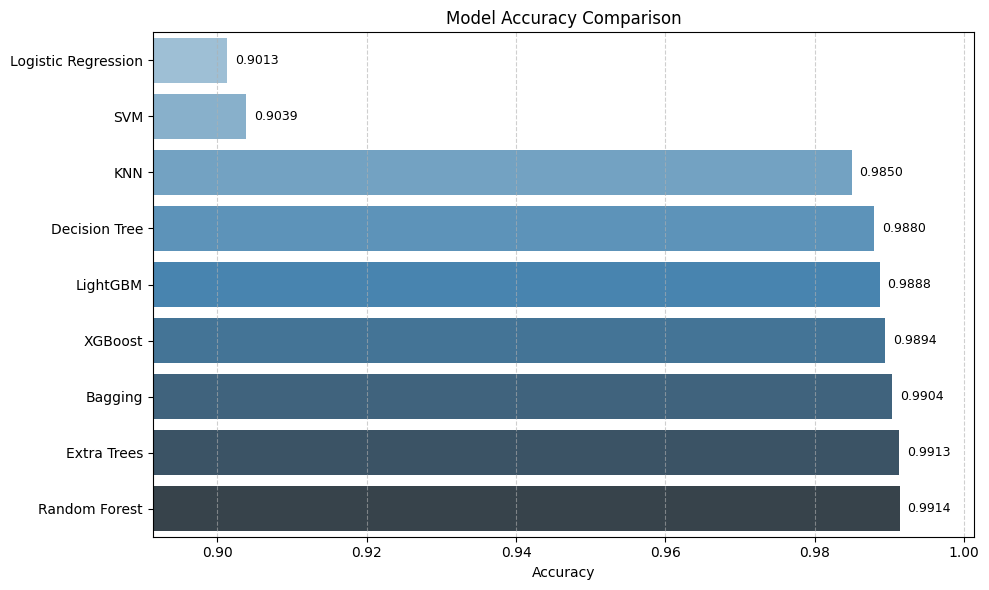

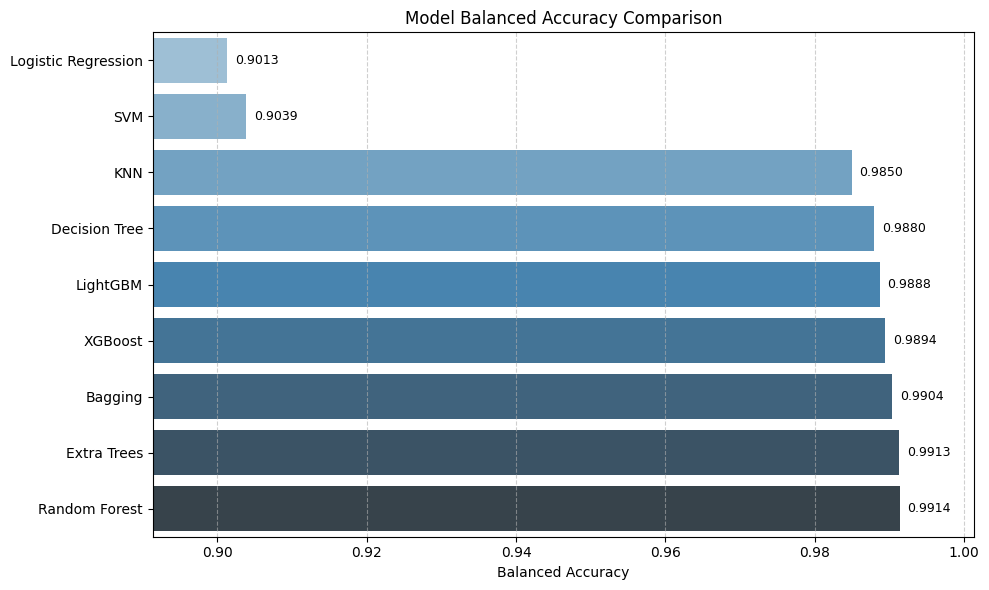

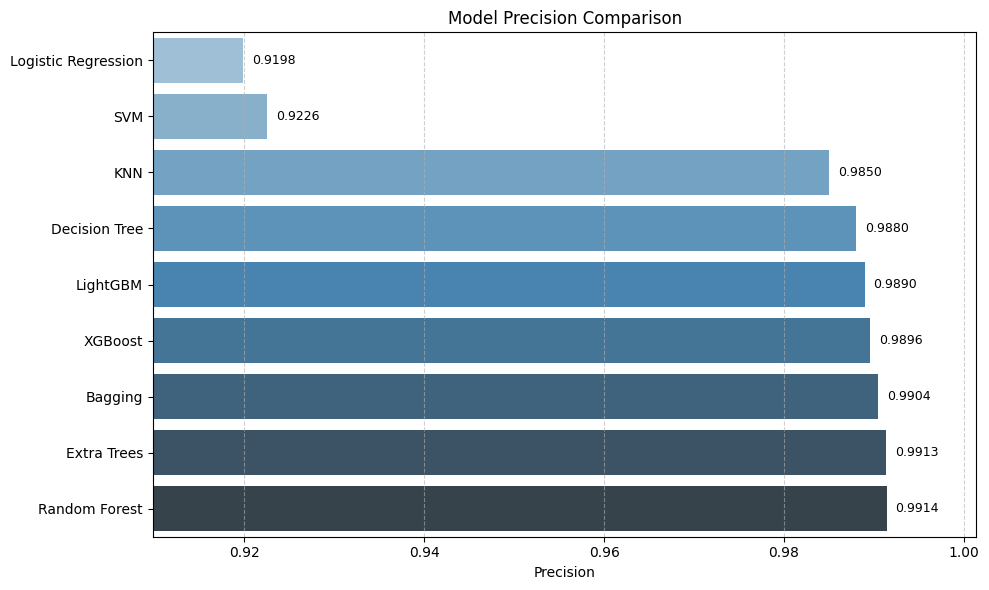

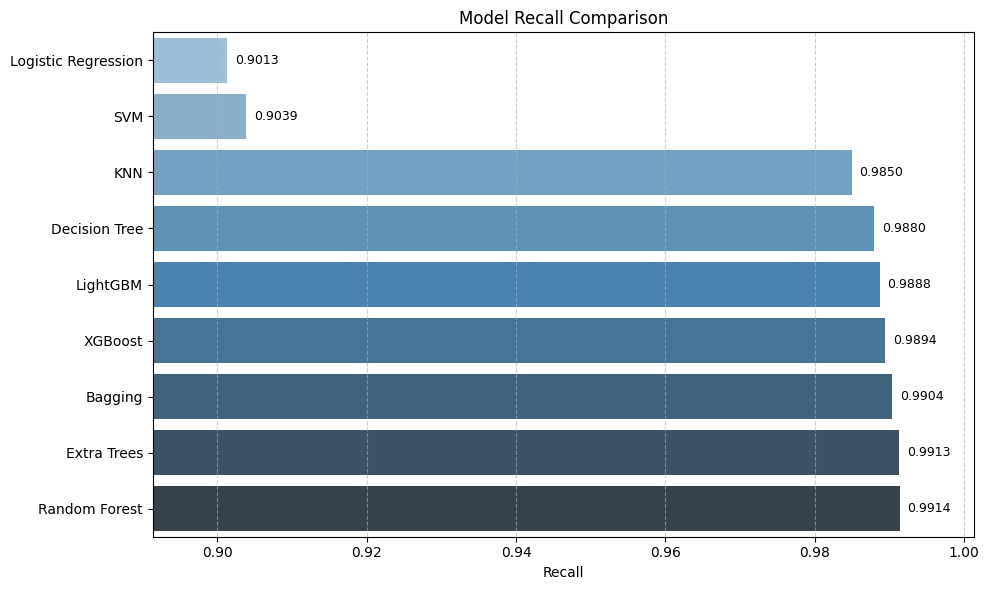

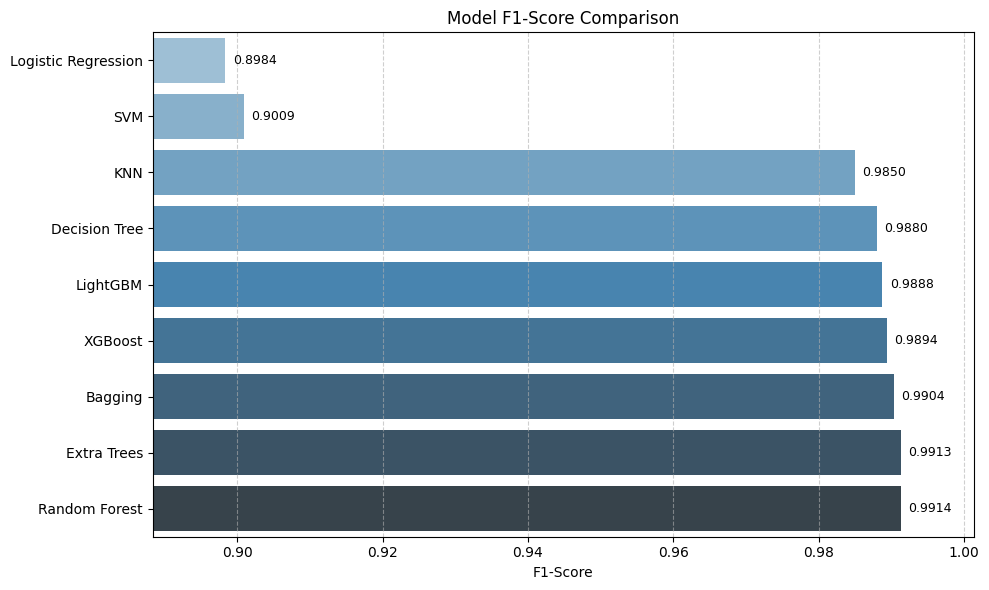

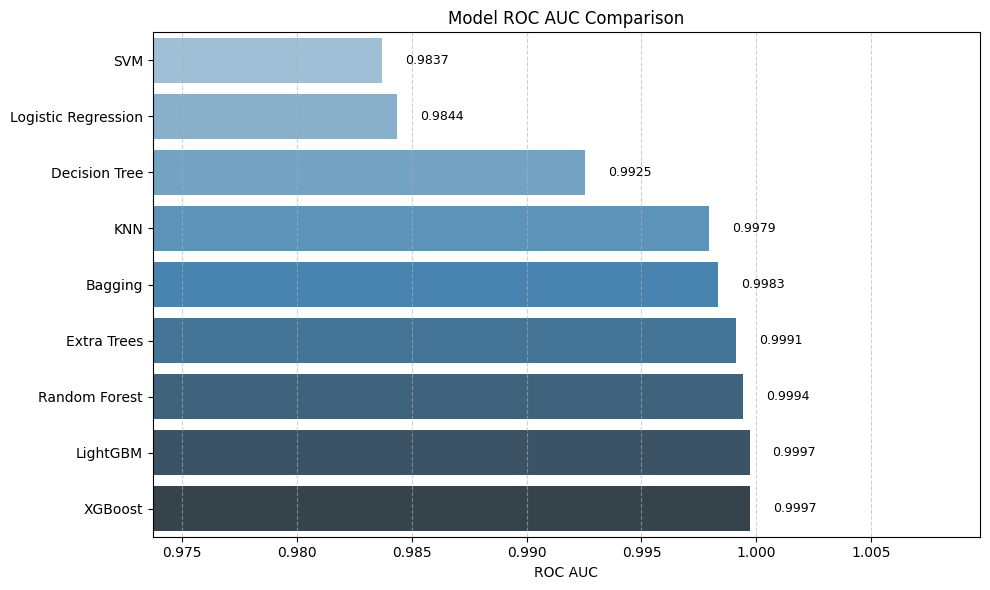

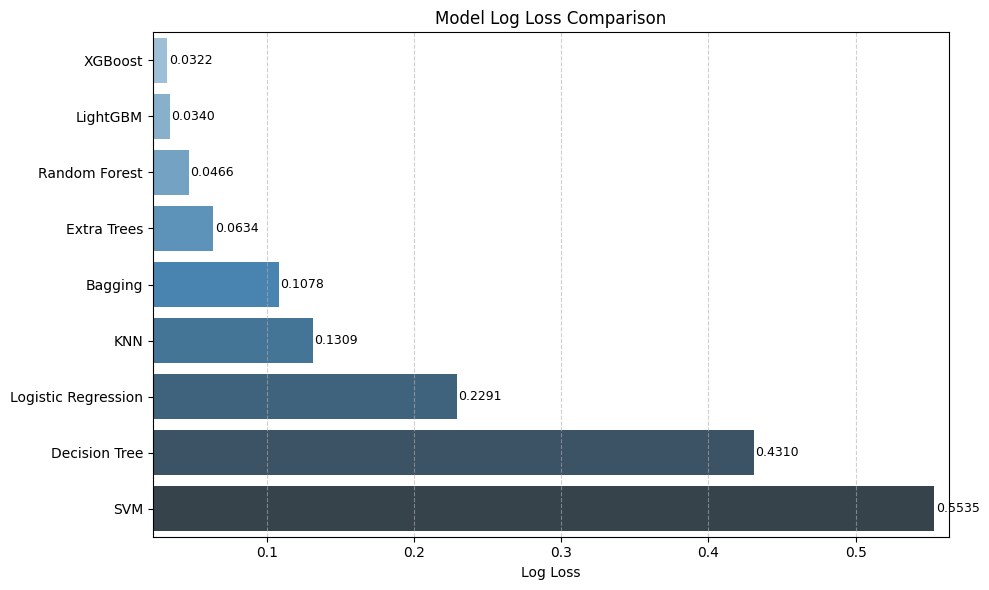

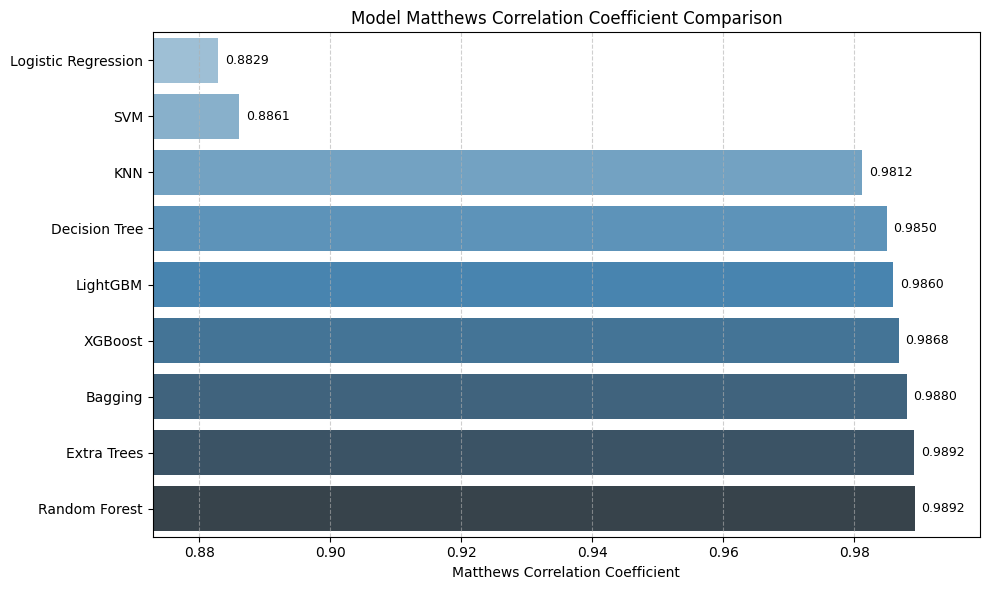

In [ ]:
def GetMetric(metric : str) -> list:
    return [metrics[metric] for _ , metrics in ModelsMetrics.items()]

for metric in MetricNames:
    PlotArrayVSModelNames(GetMetric(metric), metric)

In [ ]:
MinMaxMetricsIndex : dict[str, tuple] = {
}
for metric in MetricNames:
    min, max = numpy.argmin(GetMetric(metric)), numpy.argmax(GetMetric(metric))
    MinMaxMetricsIndex[metric] = (min, max)



In [ ]:
# Print the model names corresponding to the indices
print(f'{"Minimum loss: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Log Loss'][0]]}, with a value of : ': <35}", GetMetric('Log Loss')[MinMaxMetricsIndex['Log Loss'][0]])
print(f'{"Maximum accuracy: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Accuracy'][1]]}, with a value of : ': <35}", GetMetric('Accuracy')[MinMaxMetricsIndex['Accuracy'][1]])
print(f'{"Maximum balanced accuracy: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Balanced Accuracy'][1]]}, with a value of : ': <35}", GetMetric('Balanced Accuracy')[MinMaxMetricsIndex['Balanced Accuracy'][1]])
print(f'{"Maximum precision: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Precision'][1]]}, with a value of : ': <35}", GetMetric('Precision')[MinMaxMetricsIndex['Precision'][1]])
print(f'{"Maximum recall: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Recall'][1]]}, with a value of : ': <35}", GetMetric('Recall')[MinMaxMetricsIndex['Recall'][1]])
print(f'{"Maximum F1 score: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['F1-Score'][1]]}, with a value of : ': <35}", GetMetric('F1-Score')[MinMaxMetricsIndex['F1-Score'][1]])
print(f'{"Maximum ROC AUC: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['ROC AUC'][1]]}, with a value of : ': <35}", GetMetric('ROC AUC')[MinMaxMetricsIndex['ROC AUC'][1]])
print(f'{"Maximum Matthews correlation coefficient: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Matthews Correlation Coefficient'][1]]}, with a value of : ': <35}", GetMetric('Matthews Correlation Coefficient')[MinMaxMetricsIndex['Matthews Correlation Coefficient'][1]])


Minimum loss:                                 XGBoost, with a value of :          0.03224364293984063
Maximum accuracy:                             Random Forest, with a value of :    0.99137
Maximum balanced accuracy:                    Random Forest, with a value of :    0.9913700000000001
Maximum precision:                            Random Forest, with a value of :    0.9914017063396613
Maximum recall:                               Random Forest, with a value of :    0.99137
Maximum F1 score:                             Random Forest, with a value of :    0.9913689304116712
Maximum ROC AUC:                              XGBoost, with a value of :          0.9997346128125
Maximum Matthews correlation coefficient:     Random Forest, with a value of :    0.9892209603484421


In [ ]:
CurrentModels = {
    "LogisticRegression": ModelLR,
    "DecisionTree": ModelDT,
    "RandomForest": ModelRF,
    "SVM": ModelSVM,
    "KNN": ModelKNN,
    "XGBoost": ModelXGB,
    "LightGBM": ModelLGBM,
    "ExtraTrees": ModelETC,
    "Bagging": ModelBC,
}
CurrentMetrics = ModelsMetrics

In [ ]:
import joblib
import os

def SaveInfo(models, metrics, FilePath):
    os.makedirs(FilePath, exist_ok=True)
    joblib.dump(models, f'{FilePath}/Models.pkl')
    joblib.dump(metrics, f'{FilePath}/Metrics.pkl')
def LoadInfo(FilePath):
    mo = joblib.load(f'{FilePath}/Models.pkl')
    me = joblib.load(f'{FilePath}/Metrics.pkl')
    return mo, me

# Balanced & UnBalanced Comparison

In [ ]:
modelunbal, metricsunbal = LoadInfo('MMFolder/UnBalancedmm')
modelbal, metricsbal = LoadInfo('MMFolder/Balancedmm')

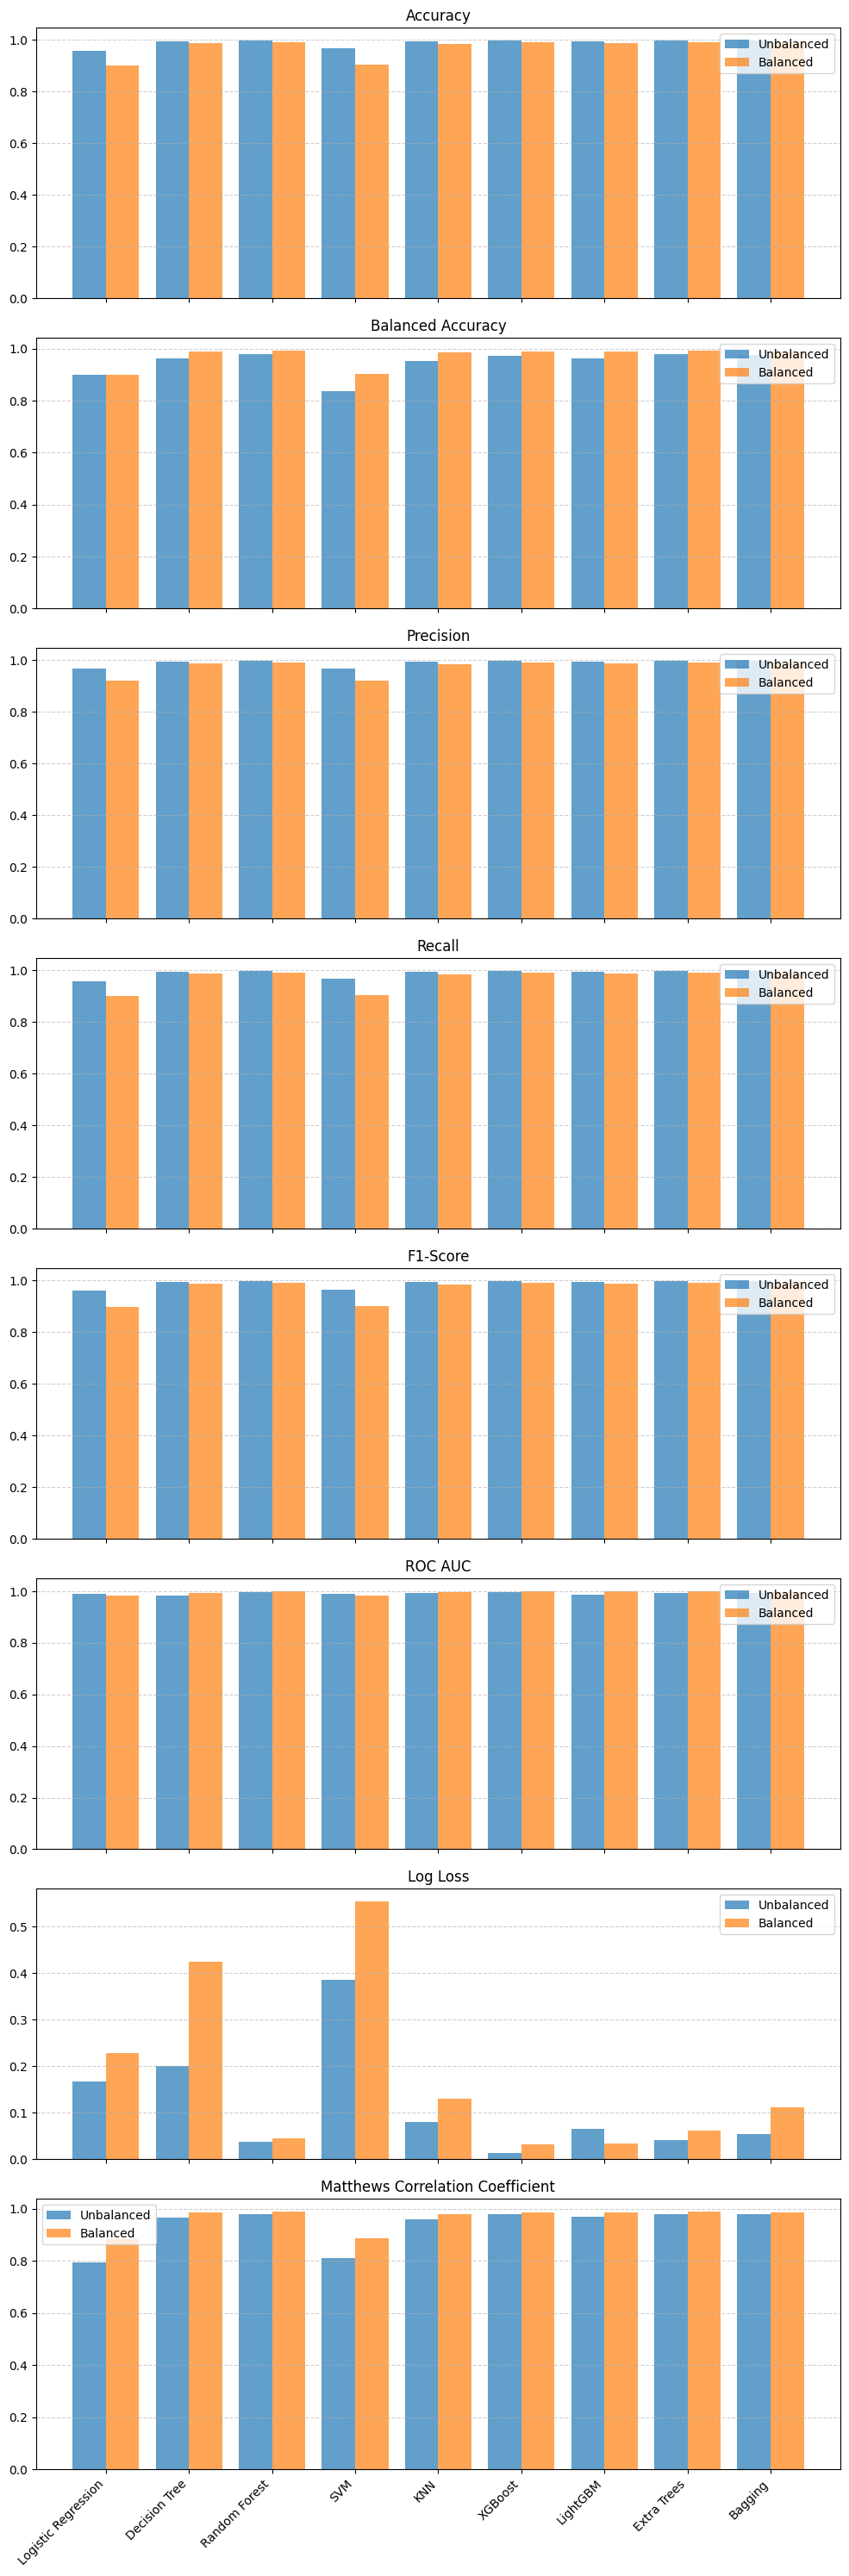

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics_names = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss', 'Matthews Correlation Coefficient']
models = list(metricsbal.keys())

unbalanced_metrics = {metric: [metricsunbal[model][metric] for model in models] for metric in metrics_names}
balanced_metrics = {metric: [metricsbal[model][metric] for model in models] for metric in metrics_names}

fig, axes = plt.subplots(len(metrics_names), 1, figsize=(10, 30), sharex=True)
for i, metric in enumerate(metrics_names):
    axes[i].bar(np.arange(len(models)) - 0.2, unbalanced_metrics[metric], width=0.4, label='Unbalanced', alpha=0.7)
    axes[i].bar(np.arange(len(models)) + 0.2, balanced_metrics[metric], width=0.4, label='Balanced', alpha=0.7)
    axes[i].set_title(metric)
    axes[i].set_xticks(np.arange(len(models)))
    axes[i].set_xticklabels(models, rotation=45, ha='right')
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()